### Crosshole traveltime tomography
We are doing a crosshole traveltime (e.g. seismics or GPR) tomography.
Assume two boreholes at x=0 and x=10m with source in one and receivers
in the other, in a spacing of 1m.
We discretize the subsurface by a 1x1m regular grid so that we can show
any model matrix just by `matshow`.

In [89]:
# define the grid by the node positions
x = 0:10;
y = 0:11;

We read a readily prepared raypath matrix (pyGIMLi notebook) which is a sparse matrix with the function `readdlm` into the integer positions i and j and the values v and create a sparse matrix.

In [36]:
using DelimitedFiles
using SparseArrays
IJV = readdlm("jacobian.ijv")
J = sparse(IJV[:, 1].+1, IJV[:, 2].+1, IJV[:, 3]);

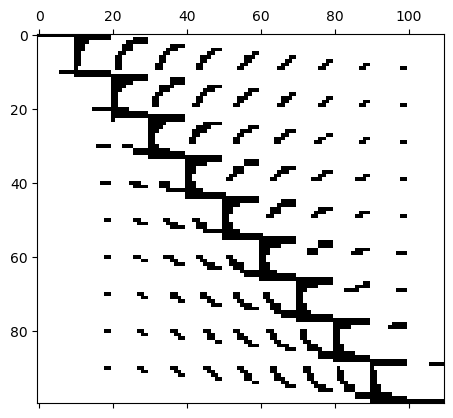

(100, 110)

In [92]:
# First we want to have a look at the matrix entries
using PyPlot
spy(J)
G = Matrix(J)  # make a dense matrix of it
size(G)  # 10x10=100 rays, 11x10=110 model cells

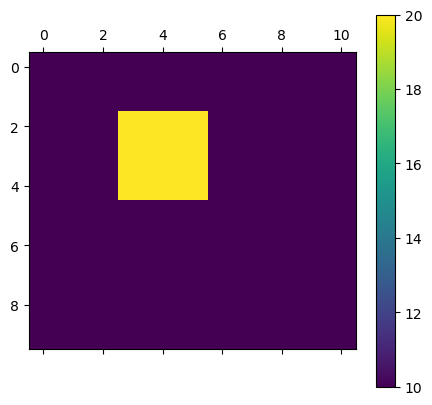

In [95]:
modelSyn = ones(length(x)-1, length(y)-1) * 10  # homogeneous
modelSyn[3:5, 4:6] .= 20  # anomaly
matshow(modelSyn)  # show the model
colorbar();

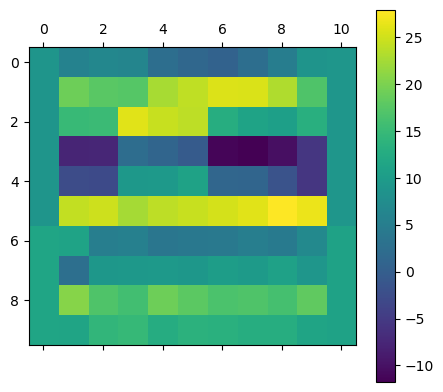

In [97]:
# Next we create synthetic data with some random noise
using LinearAlgebra
d = G * modelSyn[:]
d += randn(size(d)) * 0.1  # try also 0.3, 1, 3, 10
model = ones(size(modelSyn))
model[:] = pinv(G) * d  # fill it like a column
matshow(model)
colorbar();

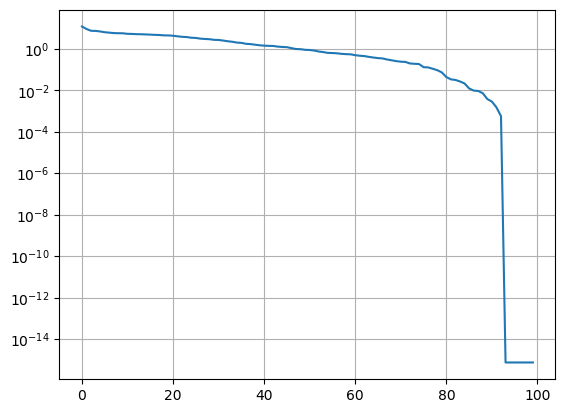

93 12.256104420332292 0.0005724840682208662

In [111]:
s = svd(G)
semilogy(s.S)
grid()
print(rank(G), " ", s.S[1], " ", s.S[rank(G)])

In [101]:
# The singular value spectrum shows that it is ill-posed
# (i.e. small singular values - steep sv spectrum)

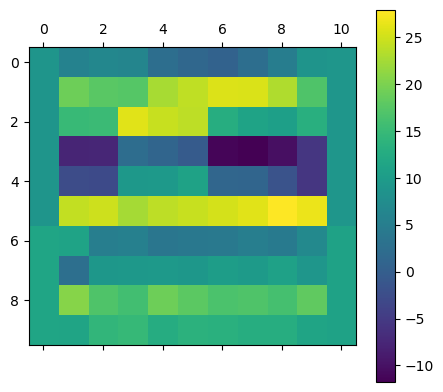

In [112]:
# We try the generalized (SVD) inverse first
model[:] = pinv(G) * d
matshow(model)
colorbar();

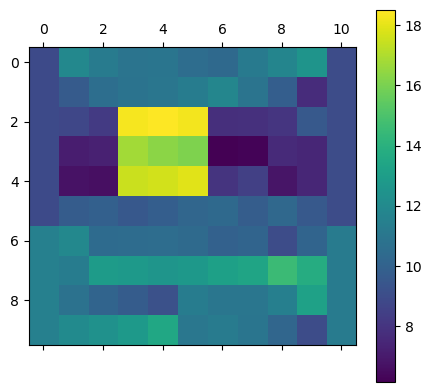

In [118]:
# We truncate small SV by rtol
model[:] = pinv(G, rtol=0.001) * d
matshow(model)
colorbar();

In [116]:
# Let's play interactively
using Interact  # interactive plots
f=figure()
rt = 10 .^ range(-6, 0, step=0.3)
@manipulate for r = -6:0.1:0
    withfig(f) do
        model[:] = pinv(G, rtol=10^r) * d
        imshow(model)
        clim(8, 22)
        colorbar()
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 61,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
31, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000015749430, Task (runnable) @0x0000000015749430), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-6.0\",\"-5.9\",\"-5.8\",\"-5.7\",\"-5.6\",\"-5.5\",\"-5.4\",\"-5.3\",\"-5.2\",\"-5.1\",\"-5.0\",\"-4.9\",\"-4.8\",\"-4.7\",\"-4.6\",\"-4.5\",\"-4.4\",\"-4.3\",\"-4.2\",\"-4.1\",\"-4.0\",\

### Tasks Part A 
For or all possible pseudoranks (1-93):

1. Compute the model using the truncated SVD inverse
1. Store the model norm in a vector
1. Store the residual norm in a vector
1. Compute the root-mean-square to the synthetic model

and plot those quantities over p.

Also plot the model norm against the residual norm and choose a `p` from these plots.

Which `p` has to be chosen according to the discrepancy principle?
(Compute the error-weighted misfit)

Repeat the computations for two higher noise levels.

### Damped least squares
We now use the damped least squares solution

$$ {\bf m} = ({\bf G}^T {\bf G} + \lambda^2 {\bf I})^{-1} {\bf d} $$

It can also be expressed by SVD through a filtered sum
$$ {\bf m} = \sum_i \frac{s_i^2}{s_i^2+\lambda^2} \frac{U_i^T{\bf d}}{s_i} V_i = f_i \frac{U_i^T{\bf d}}{s_i} V_i $$
with the filter factors
$$ f_i = \frac{s_i^2}{s_i^2+\lambda^2} = \frac{1}{1+(\lambda_i/s_i)^2} $$

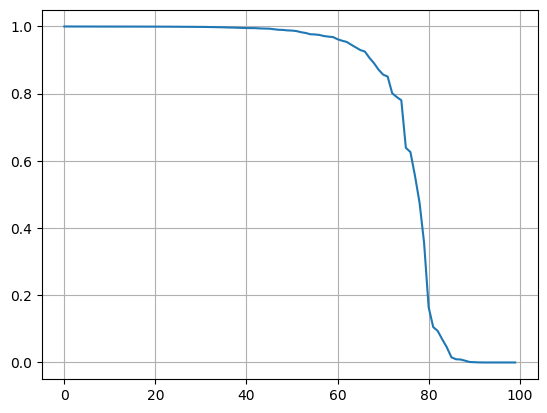

In [148]:
# Let's first have a look at the filter factor
lambda = 0.1
lamByS = lambda ./ s.S
f = 1 ./ (lamByS.^2 .+ 1)
plot(f);
grid()
# It looks like a smooth truncation of singular values

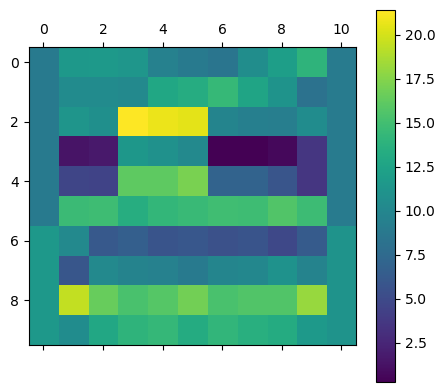

In [141]:
lambda = 0.001
nM = size(G, 2)
GT = transpose(G)
model[:] = inv(GT * G + Matrix(I, nM, nM) * lambda^2) * (GT * d)
matshow(model)
colorbar();

### Task Part B
1. Create a logarithmically equidistant lambda vector
2. Do an interactive plotting (like above for pinv)
3. Plot the same quantities as above (model norm, residual norm) over lambda and against each other.
4. Which lambda do you choose according to the discrepancy principle?
5. Repeat with the same noise levels as above (try use same data).